In [32]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [33]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Dashboard Function

In [34]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

# Extracting Tesla Stock Data Using yfinance

In [35]:
tesla = yf.Ticker("TSLA")

tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)

tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500,0,0.0
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500,0,0.0
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000,0,0.0
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000,0,0.0
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500,0,0.0


# Extracting Tesla Revenue Data Using Webscraping

In [36]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

html_data = requests.get(url).text
soup = BeautifulSoup(html_data, 'html.parser')

table = soup.find_all("tbody")[1]
rows = table.find_all("tr")
tesla_revenue = pd.DataFrame(columns=("Date", "Revenue"))
for row in rows:
    cells = row.find_all("td")
    date = str(cells[0].string)
    revenue = cells[1].string
    tesla_revenue = tesla_revenue.append({"Date": date, "Revenue": revenue}, ignore_index=True)
    
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")

tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

tesla_revenue.head()

,Date,Revenue
0,2022-09-30,21454
1,2022-06-30,16934
2,2022-03-31,18756
3,2021-12-31,17719
4,2021-09-30,13757


# Extracting GameStop Stock Data Using yfinance

In [37]:
gamestop = yf.Ticker("GME")

gme_data = gamestop.history(period="max")
gme_data.reset_index(inplace=True)

gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14,1.712707,1.716074,1.670626,1.683251,11021600,0.0,0.0
2,2002-02-15,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


# Extracting GameStop Revenue Data Using Webscraping

In [38]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, 'html.parser')

table = soup.find_all("tbody")[1]
rows = table.find_all("tr")
gme_revenue = pd.DataFrame(columns=("Date", "Revenue"))
for row in rows:
    cells = row.find_all("td")
    date = str(cells[0].string)
    revenue = cells[1].string
    gme_revenue = gme_revenue.append({"Date": date, "Revenue": revenue}, ignore_index=True)
    
gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$',"")

gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]

gme_revenue.head()

,Date,Revenue
0,2020-04-30,1021
1,2020-01-31,2194
2,2019-10-31,1439
3,2019-07-31,1286
4,2019-04-30,1548


# Tesla Stock and Revenue Dashboard

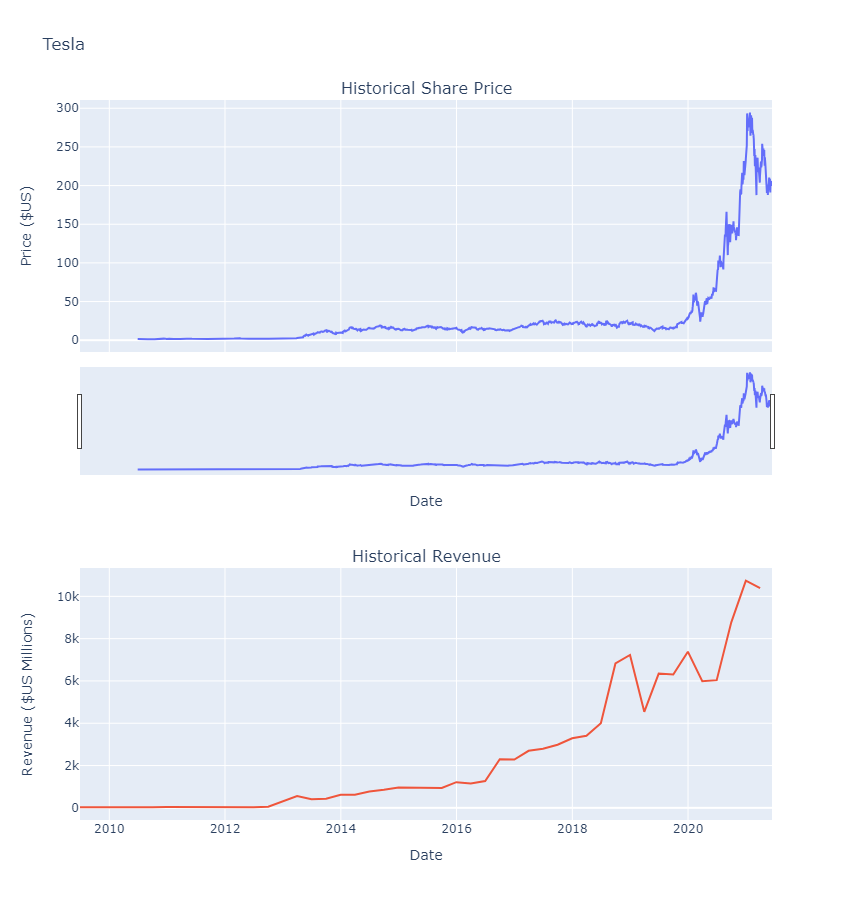

In [39]:
make_graph(tesla_data, tesla_revenue, "Tesla")

# GameStop Stock and Revenue Dashboard

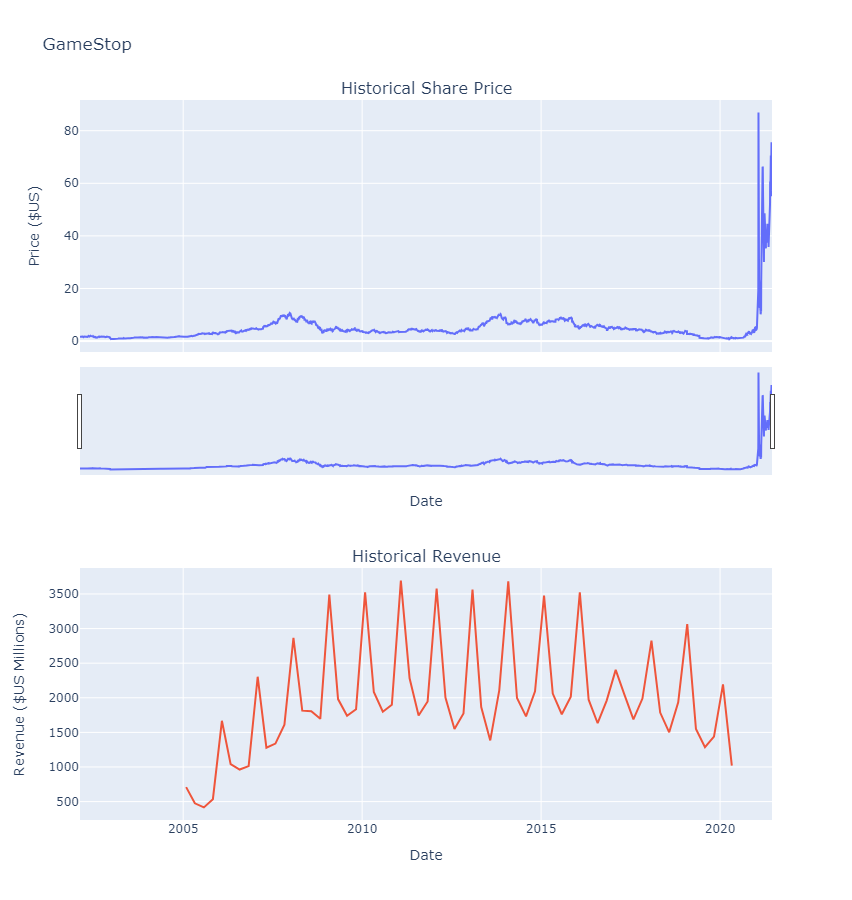

In [40]:
make_graph(gme_data, gme_revenue, "GameStop")

# Author 
Muralidharan K

07-03-2024